In [1]:
###### Machine Learning Libraries ######

import numpy as np
import pandas as pd
import scipy as shc
import nltk
import spacy
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, silhouette_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif, mutual_info_regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, VotingClassifier, VotingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from xgboost import XGBClassifier, XGBRegressor

###### Deep Learning Libraries ######

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU, Conv2D, MaxPool2D, AveragePooling2D, Flatten
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, Huber, Hinge, MSE, MAE
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Nadam, Adamax
from tensorflow.keras.regularizers import L1, L2, L1L2

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
###### Load the dataset ######
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
###### Check number of rows and columns ######
print("# of rows in this dataset is   = ", df.shape[0],'\n')
print("# of columns of its dataset is = ", df.shape[1])

# of rows in this dataset is   =  5572 

# of columns of its dataset is =  2


In [4]:
###### Check null value present in the dataset or not ######
if df.isnull().sum().sum() == 0:
  print("NaN value does not exist in this dataset.")
else:
  print("NaN value present in this dataset.")

NaN value does not exist in this dataset.


In [5]:
###### Check the dataset contains duplicate value or not ######
print("Duplicated rows in this dataset is = ", df.duplicated().sum())

Duplicated rows in this dataset is =  415


In [6]:
###### Delete the duplicated rowns from the dataset ######
df.drop_duplicates(inplace = True)
print("Duplicated rows have been deleted.\n")

df.shape

Duplicated rows have been deleted.



(5157, 2)

In [7]:
###### Check the dataset is imbalanced or not ######
df.loc[:, 'Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

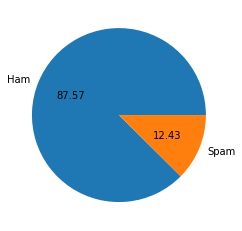

In [8]:
###### Show in the Pie Chart ######
plt.pie(df.loc[:, 'Category'].value_counts(), labels = ['Ham', 'Spam'], autopct = "%0.2f")
plt.show()

###### It is highly imbalanced dataset ######

In [9]:
###### Create a column named number_char ######
df['number_char'] = df.loc[:, 'Message'].apply(lambda x: len(x))

df.head()

,Category,Message,number_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
###### Create a column named num_sentence ######
df['num_sentence'] = df.loc[:, 'Message'].apply(lambda x: len(sent_tokenize(x)))

df.head()

,Category,Message,number_char,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,2
1,ham,Ok lar... Joking wif u oni...,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,ham,U dun say so early hor... U c already then say...,49,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1


In [11]:
###### Create a column named num_word ######
df.loc[:, 'num_word'] = df.loc[:, 'Message'].apply(lambda x: len(word_tokenize(x)))

df.head()

,Category,Message,number_char,num_sentence,num_word
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,24
1,ham,Ok lar... Joking wif u oni...,29,2,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,ham,U dun say so early hor... U c already then say...,49,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [12]:
###### Describe analysis ######
df.describe()

,number_char,num_sentence,num_word
count,5157.000000,5157.000000,5157.000000
mean,79.103936,1.950553,18.557882
std,58.382922,1.362981,13.406024
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,61.000000,1.000000,15.000000
75%,118.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


In [13]:
print("Average number of char used in this dataset is     : ", df.describe().loc['mean', 'number_char'], '%')
print("Average number of sentence used in this dataset is : ", df.describe().loc['mean', 'num_sentence'], '%')
print("Average number of word used in this dataset is     : ", df.describe().loc['mean', 'num_word'], '%')
print("\n\n")
print("Maximum number of char used in this dataset is     : ", df.describe().loc['max', 'number_char'])
print("Maximum number of sentence used in this dataset is : ", df.describe().loc['max', 'num_sentence'])
print("Maximum number of word used in this dataset is     : ", df.describe().loc['max', 'num_word'])

Average number of char used in this dataset is     :  79.10393639713011 %
Average number of sentence used in this dataset is :  1.9505526468877254 %
Average number of word used in this dataset is     :  18.55788248981966 %



Maximum number of char used in this dataset is     :  910.0
Maximum number of sentence used in this dataset is :  28.0
Maximum number of word used in this dataset is     :  220.0


In [14]:
df.loc[df.loc[:, 'Category'] == 'ham', 'Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 4516, dtype: object

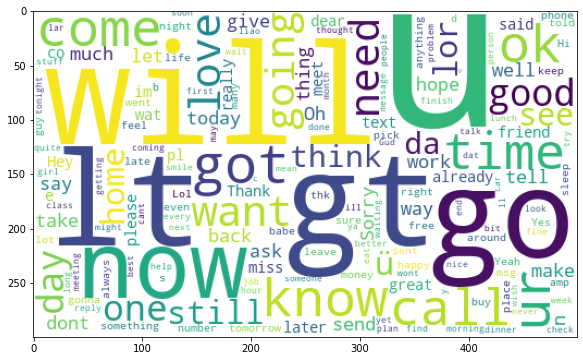

In [15]:
import wordcloud
###### Most Frquent words used in the Ham ######
from wordcloud import WordCloud

plt.figure(figsize = (10, 6))
wordcloud_ = WordCloud(width = 500, height = 300, min_font_size = 8, background_color = 'white')

ham_ = wordcloud_.generate(df.loc[df.loc[:, 'Category'] == 'ham', 'Message'].str.cat(sep = ''))
plt.imshow(ham_)

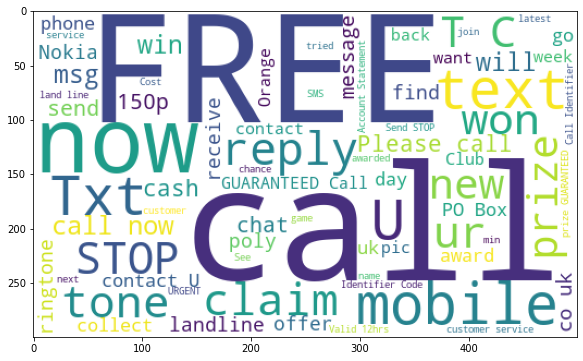

In [16]:
###### Most Frequent words in the spam ######
plt.figure(figsize = (10, 6))
wordcloud_ = WordCloud(width = 500, height = 300, min_font_size = 8, background_color = 'white')

spam_ = wordcloud_.generate(df.loc[df.loc[:, 'Category'] == 'spam', 'Message'].str.cat(sep = ''))
plt.imshow(spam_)

In [17]:
###### Check ham wise how many characters, words and sentces are being used ######
df.loc[df.loc[:, 'Category'] == 'ham', :].describe()

,number_char,num_sentence,num_word
count,4516.000000,4516.000000,4516.000000
mean,70.869353,1.806244,17.264836
std,56.708301,1.281910,13.587852
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,53.000000,1.000000,13.000000
75%,91.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


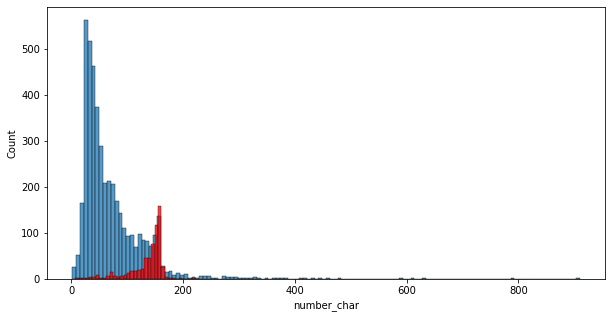

In [18]:
plt.figure(figsize = (10, 5))
sns.histplot(df.loc[df.loc[:, 'Category'] == 'ham', 'number_char'])
sns.histplot(df.loc[df.loc[:, 'Category'] == 'spam', 'number_char'], color = 'red')
plt.show()

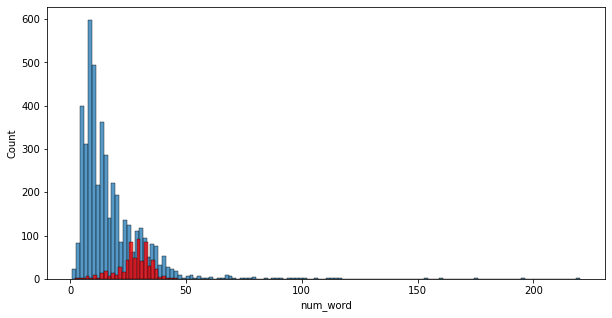

In [19]:
plt.figure(figsize = (10, 5))
sns.histplot(df.loc[df.loc[:, 'Category'] == 'ham', 'num_word'])
sns.histplot(df.loc[df.loc[:, 'Category'] == 'spam', 'num_word'], color = 'red')
plt.show()

In [20]:
###### Check spam wise how many characters, words and sentces are being used ######
df.loc[df.loc[:, 'Category'] == 'spam', :].describe()

,number_char,num_sentence,num_word
count,641.000000,641.000000,641.000000
mean,137.118565,2.967239,27.667707
std,30.399707,1.480241,7.103501
min,7.000000,1.000000,2.000000
25%,130.000000,2.000000,25.000000
50%,148.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,223.000000,8.000000,46.000000


In [21]:
###### Preprocessing should be started ######
df = df.loc[:, ['Message', 'Category']]
df.head()

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [22]:
####### Lowering the dataset #######
df.loc[:, 'Message'] = df.loc[:, 'Message'].apply(lambda x: x.lower())

df.head()

,Message,Category
0,"go until jurong point, crazy.. available only ...",ham
1,ok lar... joking wif u oni...,ham
2,free entry in 2 a wkly comp to win fa cup fina...,spam
3,u dun say so early hor... u c already then say...,ham
4,"nah i don't think he goes to usf, he lives aro...",ham


In [23]:
###### Label Encoding in the target column #######
df.loc[:, 'Category'] = df.loc[:, 'Category'].map({'ham': 0, 'spam': 1})

df.head()

,Message,Category
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


In [24]:
###### Remove all unnecssay tagline from the dataset ######
def removeTag(eachRow_):
  clean_text_ =  re.sub(re.compile('[^a-zA-Z]'), ' ', eachRow_)
  return clean_text_

df.loc[:, 'Message'] = df.loc[:, 'Message'].apply(removeTag)

df.head()

,Message,Category
0,go until jurong point crazy available only ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives aro...,0


In [25]:
###### Remove the stopwords ######
def remove_stopwords(eachRecord_):
  cleaned_text_ = []

  for word_ in word_tokenize(eachRecord_):
    if word_ in stopwords.words('english'):
      pass
    else:
      cleaned_text_.append(word_)
  
  return ' '.join(cleaned_text_)

df.loc[:, 'Message'] = df.loc[:, 'Message'].apply(remove_stopwords)
print("Stopwords have been deleted from the dataset.")

df.head()

Stopwords have been deleted from the dataset.


,Message,Category
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0


In [26]:
###### Using Stemming in this dataset #######
PorterStemmer_ = PorterStemmer()
def stemming(eachRecord_):
  cleaned_text_ = []

  for word_ in word_tokenize(eachRecord_):
    cleaned_text_.append(PorterStemmer_.stem(word_))

  return ' '.join(cleaned_text_)

df.loc[:, 'Message'] = df.loc[:, 'Message'].apply(stemming)

df.head()

,Message,Category
0,go jurong point crazi avail bugi n great world...,0
1,ok lar joke wif u oni,0
2,free entri wkli comp win fa cup final tkt st m...,1
3,u dun say earli hor u c alreadi say,0
4,nah think goe usf live around though,0


In [27]:
###### Split the dataset into X and Y ######
X = df.loc[:, 'Message']
y = df.loc[:, 'Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

print("X_train shape is: ", X_train.shape, '\n')
print("y_train shape is: ", y_train.shape, '\n')
print("X_test  shape is: ", X_test.shape, '\n')
print("y_test  shape is: ", y_test.shape, '\n')

X_train shape is:  (3867,) 

y_train shape is:  (3867,) 

X_test  shape is:  (1290,) 

y_test  shape is:  (1290,) 



In [28]:
###### Using BOW - Bag Of Word in order to convert words into vectors ######

BOW_ = CountVectorizer()

X_train = BOW_.fit_transform(X_train).toarray()
X_test  = BOW_.transform(X_test).toarray()

X_train.shape, X_test.shape

((3867, 5385), (1290, 5385))

In [29]:
###### GaussianNB, BernoulliNB, MultinomialNB

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.8837209302325582
recall score is   =  0.5287769784172662
f1 score of its   =  0.6621621621621622
precision score is=  0.8855421686746988


In [30]:
confusion_matrix(predicted_, y_test)

array([[993,  19],
       [131, 147]])

In [31]:
###### GaussianNB, BernoulliNB, MultinomialNB

BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)
predicted_ = BernoulliNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.975968992248062
recall score is   =  0.9856115107913669
f1 score of its   =  0.8983606557377048
precision score is=  0.8253012048192772


In [32]:
confusion_matrix(predicted_, y_test)

array([[1122,   29],
       [   2,  137]])

In [33]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.9844961240310077
recall score is   =  0.9294117647058824
f1 score of its   =  0.9404761904761904
precision score is=  0.9518072289156626


In [34]:
confusion_matrix(predicted_, y_test)

array([[1112,    8],
       [  12,  158]])

In [35]:
##### SGD Classifier ######

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.9868217054263566
recall score is   =  0.9570552147239264
f1 score of its   =  0.9483282674772037
precision score is=  0.9397590361445783


In [36]:
confusion_matrix(predicted_, y_test)

array([[1117,   10],
       [   7,  156]])

In [37]:
###### MLP Classifier #######

MLPClassifier_ = MLPClassifier()
MLPClassifier_.fit(X_train, y_train)
predicted_ = MLPClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.9844961240310077
recall score is   =  0.9866666666666667
f1 score of its   =  0.9367088607594936
precision score is=  0.891566265060241


In [38]:
confusion_matrix(predicted_, y_test)

array([[1122,   18],
       [   2,  148]])

In [39]:
###### Using TFIDF ######

TFIDF_ = TfidfVectorizer(max_features = 500)
X = TFIDF_.fit_transform(X).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

print("X_train shape is: ", X_train.shape, '\n')
print("y_train shape is: ", y_train.shape, '\n')
print("X_test  shape is: ", X_test.shape, '\n')
print("y_test  shape is: ", y_test.shape, '\n')

X_train shape is:  (3867, 500) 

y_train shape is:  (3867,) 

X_test  shape is:  (1290, 500) 

y_test  shape is:  (1290,) 



In [40]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.36427714,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.73013314, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
###### GaussianNB, BernoulliNB, MultinomialNB

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.7248062015503876
recall score is   =  0.31137724550898205
f1 score of its   =  0.4677661169415293
precision score is=  0.9397590361445783


In [42]:
confusion_matrix(predicted_, y_test)

array([[779,  10],
       [345, 156]])

In [43]:
###### GaussianNB, BernoulliNB, MultinomialNB

BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)
predicted_ = BernoulliNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.9883720930232558
recall score is   =  0.9808917197452229
f1 score of its   =  0.9535603715170279
precision score is=  0.927710843373494


In [44]:
confusion_matrix(predicted_, y_test)

array([[1121,   12],
       [   3,  154]])

In [45]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.9790697674418605
recall score is   =  0.954248366013072
f1 score of its   =  0.915360501567398
precision score is=  0.8795180722891566


In [46]:
confusion_matrix(predicted_, y_test)

array([[1117,   20],
       [   7,  146]])

In [47]:
##### SGD Classifier ######

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.986046511627907
recall score is   =  0.9683544303797469
f1 score of its   =  0.9444444444444444
precision score is=  0.9216867469879518


In [48]:
confusion_matrix(predicted_, y_test)

array([[1119,   13],
       [   5,  153]])

In [49]:
###### MLP Classifier #######

MLPClassifier_ = MLPClassifier()
MLPClassifier_.fit(X_train, y_train)
predicted_ = MLPClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.9744186046511628
recall score is   =  0.88
f1 score of its   =  0.9032258064516129
precision score is=  0.927710843373494


In [50]:
confusion_matrix(predicted_, y_test)

array([[1103,   12],
       [  21,  154]])

Using Shallow Deep Learning

In [51]:
X.shape

(5157, 500)

In [52]:
###### Create an sequential model ######
model = Sequential()

###### Create an input layer with 128 neurons ######
model.add(Dense(units = 128, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1], kernel_regularizer = L2()))
model.add(BatchNormalization())

###### Create first hidden layer with 64 neurons ######
model.add(Dense(units = 64, kernel_initializer = 'he_normal', activation = 'relu', kernel_regularizer = L2()))
model.add(BatchNormalization())

###### Create an output layer ######
model.add(Dense(units = 1, activation = 'sigmoid'))

###### Compile the model #####
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 32, verbose = 1)

Epoch 1/25
121/121 [==============================] - 2s 6ms/step - loss: 2.7458 - accuracy: 0.8218 - val_loss: 1.9641 - val_accuracy: 0.9233
Epoch 2/25
121/121 [==============================] - 1s 5ms/step - loss: 1.1164 - accuracy: 0.9780 - val_loss: 1.0415 - val_accuracy: 0.8845
Epoch 3/25
121/121 [==============================] - 1s 5ms/step - loss: 0.5571 - accuracy: 0.9845 - val_loss: 0.6330 - val_accuracy: 0.9078
Epoch 4/25
121/121 [==============================] - 1s 5ms/step - loss: 0.3474 - accuracy: 0.9837 - val_loss: 0.3911 - val_accuracy: 0.9574
Epoch 5/25
121/121 [==============================] - 1s 5ms/step - loss: 0.2369 - accuracy: 0.9873 - val_loss: 0.2669 - val_accuracy: 0.9721
Epoch 6/25
121/121 [==============================] - 1s 5ms/step - loss: 0.1746 - accuracy: 0.9912 - val_loss: 0.1974 - val_accuracy: 0.9798
Epoch 7/25
121/121 [==============================] - 1s 5ms/step - loss: 0.1500 - accuracy: 0.9889 - val_loss: 0.1715 - val_accuracy: 0.9837
Epoch 

In [53]:
predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test))
print("f1 score of its   = ", f1_score(predicted_, y_test))
print("precision score is= ", precision_score(predicted_, y_test))

accuracy score is =  0.9829457364341085
recall score is   =  0.9337349397590361
f1 score of its   =  0.9337349397590361
precision score is=  0.9337349397590361


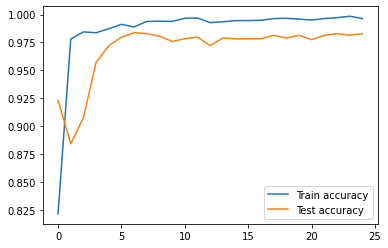

In [54]:
plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

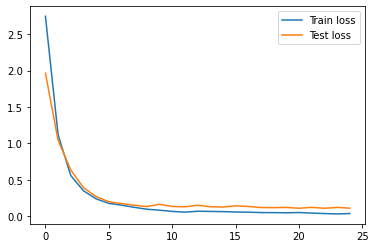

In [55]:
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

Using Word2Vec Technique


In [56]:
###### Load the dataset ######
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
###### Delete the duplicated rowns from the dataset ######
df.drop_duplicates(inplace = True)
print("Duplicated rows have been deleted.\n")

df.shape

Duplicated rows have been deleted.



(5157, 2)

In [58]:
####### Lowering the dataset #######
df.loc[:, 'Message'] = df.loc[:, 'Message'].apply(lambda x: x.lower())

df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [59]:
###### Label Encoding in the target column #######
df.loc[:, 'Category'] = df.loc[:, 'Category'].map({'ham': 0, 'spam': 1})

df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [60]:
###### Remove all unnecssay tagline from the dataset ######
def removeTag(eachRow_):
  clean_text_ =  re.sub(re.compile('[^a-zA-Z]'), ' ', eachRow_)
  return clean_text_

df.loc[:, 'Message'] = df.loc[:, 'Message'].apply(removeTag)

df.head()

,Category,Message
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...


In [61]:
###### Remove the stopwords ######
def remove_stopwords(eachRecord_):
  cleaned_text_ = []

  for word_ in word_tokenize(eachRecord_):
    if word_ in stopwords.words('english'):
      pass
    else:
      cleaned_text_.append(word_)
  
  return ' '.join(cleaned_text_)

df.loc[:, 'Message'] = df.loc[:, 'Message'].apply(remove_stopwords)
print("Stopwords have been deleted from the dataset.")

df.head()

Stopwords have been deleted from the dataset.


,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though


In [62]:
###### Using Stemming in this dataset #######
WordNetLemmatizer_ = WordNetLemmatizer()
def stemming(eachRecord_):
  cleaned_text_ = []

  for word_ in word_tokenize(eachRecord_):
    cleaned_text_.append(WordNetLemmatizer_.lemmatize(word_))

  return ' '.join(cleaned_text_)

df.loc[:, 'Message'] = df.loc[:, 'Message'].apply(stemming)

df.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [63]:
import gensim
from gensim.utils import simple_preprocess

message_ = []

for document_ in df.loc[:, 'Message']:
  each_sentence = sent_tokenize(document_)
  for sentence_ in each_sentence:
    message_.append(simple_preprocess(sentence_))

In [64]:
message_[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [65]:
message_[1]

['ok', 'lar', 'joking', 'wif', 'oni']

In [66]:
check_ = pd.DataFrame((np.array(message_)), columns = ['text'])
check_.loc[:, 'text'] = check_.loc[:, 'text'].apply(lambda x: ' '.join(x))
check_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,text
0,go jurong point crazy available bugis great wo...
1,ok lar joking wif oni
2,free entry wkly comp win fa cup final tkts st ...
3,dun say early hor already say
4,nah think go usf life around though


In [67]:
###### Now using Gensim function ######

word2vec_ = gensim.models.Word2Vec(window = 10, min_count = 2)

In [68]:
##### BUILD THE VOCABULARY FROM THE MESSAGE CORPUS #####
word2vec_.build_vocab(message_)

In [69]:
word2vec_.train(message_, total_examples = word2vec_.corpus_count, epochs = word2vec_.epochs)

(181018, 216255)

In [70]:
for _ in word2vec_.wv.index2word:
  print(_, " ", end = " ")

call   get   ur   go   gt   lt   ok   day   know   free   got   like   time   come   good   want   text   love   need   one   send   going   today   lor   home   txt   see   stop   still   back   take   da   think   dont   reply   tell   hi   mobile   sorry   new   please   phone   week   night   co   make   msg   well   min   thing   hey   oh   hope   much   say   na   give   great   wat   number   dear   later   pls   message   way   happy   claim   work   wan   friend   yes   let   already   ask   yeah   babe   im   really   right   www   tomorrow   prize   meet   thanks   find   said   life   cash   lol   would   miss   anything   last   also   sure   year   morning   something   service   keep   tone   care   every   win   feel   com   wait   uk   next   buy   around   tonight   urgent   first   sent   amp   pick   money   contact   guy   gon   could   even   soon   nokia   show   place   ya   sleep   late   someone   dun   help   box   gud   leave   word   always   many   lot   c

In [71]:
len(word2vec_.wv.index2word)

3256

In [72]:
###### Average Word2Vec ######
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in word2vec_.wv.index2word]
    return np.mean(word2vec_.wv[doc], axis=0)

In [73]:
df.loc[:, 'Message'].values[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [74]:
###### Check for first record #######
print(document_vector(df.loc[:, 'Message'].values[0]))

[-1.10395662e-01 -1.04220025e-01  2.95531973e-02 -9.89704276e-04
 -8.15750659e-02  1.19975261e-01  4.36707258e-01  3.24547030e-02
 -8.71010125e-02  1.67170569e-01  7.37319216e-02  4.08214897e-01
 -2.34079940e-04 -3.31834525e-01  7.56408349e-02 -4.80942845e-01
 -1.09692113e-02  3.19277167e-01 -1.04833342e-01 -5.11080436e-02
  1.78637788e-01  1.28069848e-01  5.67559302e-01  6.81764111e-02
  6.57390580e-02 -3.88312548e-01 -7.67605146e-03  2.38824844e-01
 -2.40192369e-01  1.10792130e-01  2.05753446e-02 -2.18938306e-01
 -8.17109458e-03 -1.28656641e-01 -2.20688894e-01  3.88166718e-02
  2.26682261e-01 -4.70129281e-01  2.09461808e-01 -4.85349178e-01
 -7.63820708e-02  2.28441432e-01  3.46120209e-01  1.75585374e-01
  1.81782380e-01 -2.72394121e-01 -9.94223822e-03 -1.36468098e-01
  2.65801579e-01  3.65295224e-02 -6.56902418e-02 -3.50214511e-01
  1.18711114e-01 -2.10342109e-02 -9.27948877e-02  2.42526427e-01
 -1.43562689e-01  1.73975408e-01 -2.33662367e-01 -8.73091863e-04
 -3.01889211e-01  2.02811

In [75]:
df.shape

(5157, 2)

In [76]:
# from tqdm import tqdm
# X = []
# for doc in (df['Message'].values):
#     X.append(document_vector(doc))